# Customer Churn Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/Prabhune/Documents/customer_churn_dataset-training-master.csv")
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


                                    
 The given dataset reveals information on various factors relating to the customer churn of a specific ott platform. This dataset consists of 440832     rows and 11 columns with relevant customer information like age, gender, support clls, tenure, contract length,subscription type,etc.

## Data Preprocessing

In [4]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

 There is one null value in each row. Therefore may drop that row from the dataset

In [5]:
data.dropna(inplace=True)

Also we drop the column of Customer ID. Since, it is of no use in the analysis

In [6]:
data.drop("CustomerID",axis=1,inplace=True)

In [7]:
data.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Now there are zero null values in the dataset

In [8]:
convert_dict = {'Age': int,
                'Tenure': int,
                'Usage Frequency': int,   
                'Support Calls' : int,
                'Payment Delay' : int,
                'Last Interaction': int,
                'Churn': int
                }
 
data = data.astype(convert_dict)
data["Churn"]=data["Churn"].astype(str)

## Model Building

In [9]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data["Gender"] = l.fit_transform(data["Gender"])
data["Subscription Type"] = l.fit_transform(data["Subscription Type"])
data["Contract Length"] = l.fit_transform(data["Contract Length"])

 Label encoder is used to code the categorical data into numeric values.                        
 In this Dataset Gender, Subscription Type and Contract length are coded as follows:                    
 1. Gender : Female(0) and Male(1)
 2. Subscription Type: Basic(0), Premium(1), Standard(2)
 3. Contract Length: Annual(0), Monthly(1), Quaterly(2)

## Model Evaluation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

From the decision tree algorithem find important features and remove the unnessesary features from the data

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

In [13]:
dtree.feature_importances_
pd.DataFrame({"variable":X_train.columns,"imp":dtree.feature_importances_ *100}).sort_values("imp",ascending=False)                  

,variable,imp
4,Support Calls,35.895887
8,Total Spend,24.233860
0,Age,14.480213
5,Payment Delay,13.076946
7,Contract Length,5.912838
9,Last Interaction,4.745209
2,Tenure,0.768108
1,Gender,0.628781
6,Subscription Type,0.195240
3,Usage Frequency,0.062918


In [98]:
# Train and test split
from sklearn.model_selection import train_test_split
X=data.iloc[:,[9,2,1,6,3]]
Y=data["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)
X_train.shape

(352665, 5)

### 1. Logistic Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score, recall_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [17]:
pred_LR=LR.predict(X_test)

In [18]:
# Accuracy
LR_accuracy=accuracy_score(Y_test,pred_LR)
print("Accuracy:",LR_accuracy)

Accuracy: 0.5760205065387276


In [19]:
# Classification Report
CR=classification_report(Y_test,pred_LR)
print(CR)

              precision    recall  f1-score   support

           0       0.52      0.36      0.42     38196
           1       0.60      0.74      0.66     49971

    accuracy                           0.58     88167
   macro avg       0.56      0.55      0.54     88167
weighted avg       0.56      0.58      0.56     88167



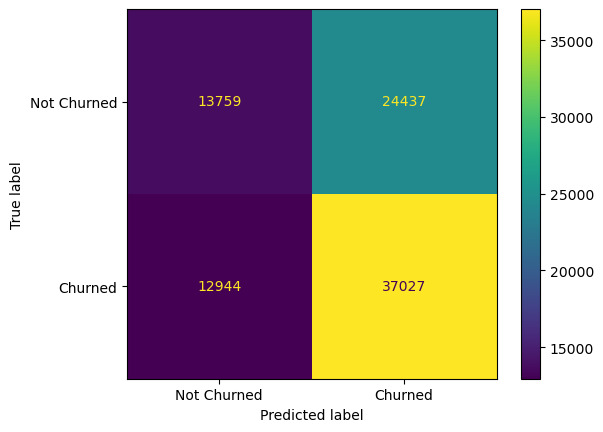

In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_LR)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [21]:
# Model fitting with GridSearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
Model1= GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [22]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_LR =Model1.predict(X_test)
# Print values
print("Best parameters found: ", Model1.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_LR))
print("Classification Report:\n", classification_report(Y_test, g_pred_LR))

Best parameters found:  {'C': 0.1, 'solver': 'liblinear'}
Accuracy:  0.5760205065387276
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.36      0.42     38196
           1       0.60      0.74      0.66     49971

    accuracy                           0.58     88167
   macro avg       0.56      0.55      0.54     88167
weighted avg       0.56      0.58      0.56     88167



### 2. Naive Baya's 

In [23]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,Y_train)
pred_NB=nb.predict(X_test)
pred_NB

array(['1', '1', '1', ..., '0', '1', '1'], dtype='<U1')

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score
NB_accuracy=accuracy_score(Y_test,pred_NB)
print("Accuracy:",NB_accuracy)

Accuracy: 0.5760772170993682


In [25]:
# Classification report
from sklearn.metrics import classification_report
NB_report=classification_report(Y_test,pred_NB)
print(NB_report)

              precision    recall  f1-score   support

           0       0.52      0.36      0.43     38196
           1       0.60      0.74      0.66     49971

    accuracy                           0.58     88167
   macro avg       0.56      0.55      0.54     88167
weighted avg       0.56      0.58      0.56     88167



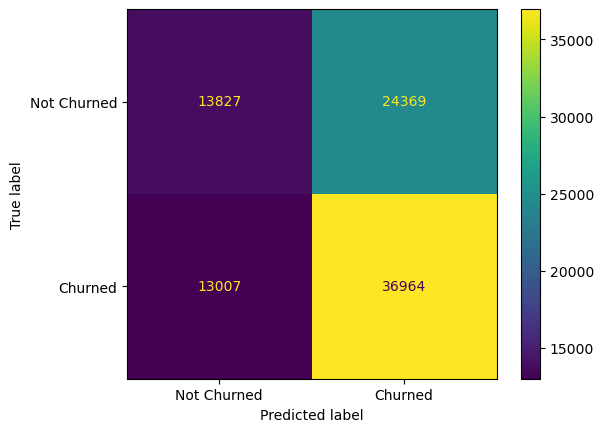

In [26]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_NB,labels=nb.classes_)
cm
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [27]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
Model2= GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
Model2.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=2)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_NB = Model2.predict(X_test)
# Print values
print("Best parameters found: ", Model2.best_params_)
print("Accuracy: ", accuracy_score(Y_test,g_pred_NB))
print("Classification Report:\n", classification_report(Y_test, g_pred_NB))

Best parameters found:  {'var_smoothing': 1e-06}
Accuracy:  0.5761112434357526
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.36      0.43     38196
           1       0.60      0.74      0.66     49971

    accuracy                           0.58     88167
   macro avg       0.56      0.55      0.54     88167
weighted avg       0.56      0.58      0.56     88167



### 3.KNN Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
ky_pred=knn.predict(X_test)
ky_pred

array(['1', '0', '1', ..., '1', '1', '1'], dtype=object)

In [31]:
# Accuracy
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(Y_test,ky_pred)
print("Accuracy:",knn_accuracy)

Accuracy: 0.5957784658659135


In [32]:
# Classification report
from sklearn.metrics import classification_report
knn_report=classification_report(Y_test,ky_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.53      0.54      0.54     38196
           1       0.64      0.64      0.64     49971

    accuracy                           0.60     88167
   macro avg       0.59      0.59      0.59     88167
weighted avg       0.60      0.60      0.60     88167



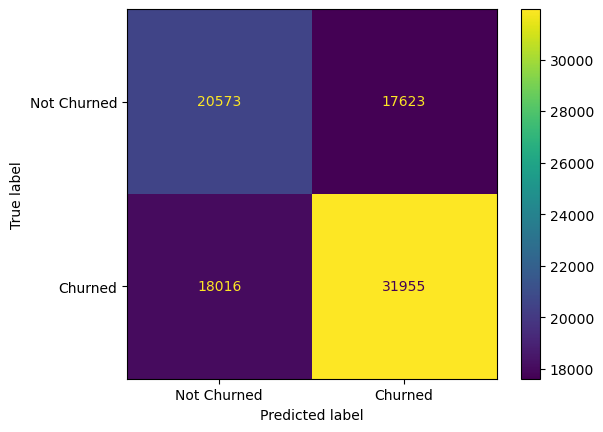

In [33]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,ky_pred)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [34]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

Model3= GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model3.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [35]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_knn = Model3.predict(X_test)
# Print values
print("Best parameters found: ", Model3.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_knn))
print("Classification Report:\n", classification_report(Y_test, g_pred_knn))

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy:  0.6016877062846643
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57     38196
           1       0.67      0.60      0.63     49971

    accuracy                           0.60     88167
   macro avg       0.60      0.60      0.60     88167
weighted avg       0.61      0.60      0.60     88167



### 4. Decision Tree

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x=["Age","Support Calls","Payment Delay","Contract Length","Total Spend"]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

In [ ]:
tree.plot_tree(dtree,feature_names=x)
plt.show()

In [37]:
dt_pred=dtree.predict(X_test)
dt_pred

array(['1', '1', '1', ..., '1', '1', '0'], dtype=object)

In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
DT_accuracy=accuracy_score(Y_test,dt_pred)
print("Accuracy:",DT_accuracy)

Accuracy: 0.6023115224517109


In [39]:
# Classification report
from sklearn.metrics import classification_report
dt_report=classification_report(Y_test,dt_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.54      0.62      0.57     38196
           1       0.67      0.59      0.63     49971

    accuracy                           0.60     88167
   macro avg       0.60      0.60      0.60     88167
weighted avg       0.61      0.60      0.60     88167



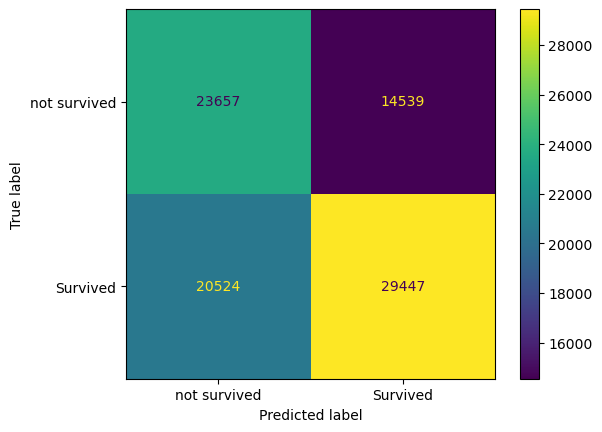

In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,dt_pred)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

In [41]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 15, 25, 35, 45],  # Maximum depth of the tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
Model4= GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model4.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 25, 35, 45]},
             verbose=2)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_dtree = Model4.predict(X_test)
# Print values
print("Best parameters found: ", Model4.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_dtree))
print("Classification Report:\n", classification_report(Y_test, g_pred_dtree))

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10}
Accuracy:  0.6172150577880613
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.90      0.67     38196
           1       0.84      0.40      0.54     49971

    accuracy                           0.62     88167
   macro avg       0.69      0.65      0.61     88167
weighted avg       0.71      0.62      0.60     88167



### 5. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
pred_RF=clf.predict(X_test)
pred_RF

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [45]:
# Accuracy
from sklearn.metrics import accuracy_score
RF_accuracy=accuracy_score(Y_test,pred_RF)
print("Accuracy:",RF_accuracy)

Accuracy: 0.5988862045890185


In [46]:
# Classification report
from sklearn.metrics import classification_report
RF_report=classification_report(Y_test,pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       0.54      0.55      0.54     38196
           1       0.65      0.63      0.64     49971

    accuracy                           0.60     88167
   macro avg       0.59      0.59      0.59     88167
weighted avg       0.60      0.60      0.60     88167



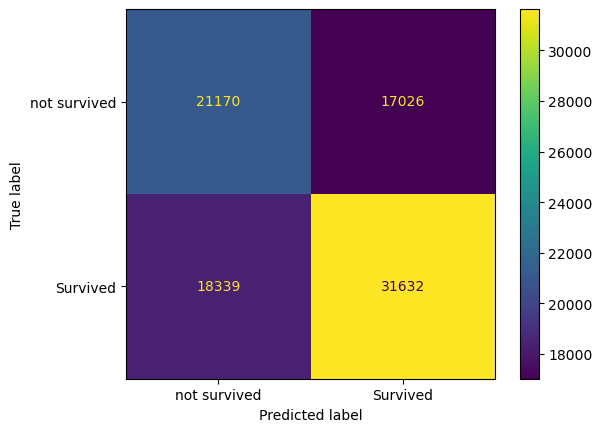

In [47]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_RF)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

### 6. Gradient Boosting classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [49]:
pred_GB=gbc.predict(X_test)
pred_GB

array(['1', '0', '0', ..., '0', '1', '0'], dtype=object)

In [50]:
from sklearn.metrics import accuracy_score
gbc_accur_score=accuracy_score(Y_test,pred_GB)
print("Accuracy:",gbc_accur_score)

Accuracy: 0.6229087980763778


In [51]:
# Classification report
from sklearn.metrics import classification_report
GB_report=classification_report(Y_test,pred_GB)
print(GB_report)

              precision    recall  f1-score   support

           0       0.54      0.98      0.69     38196
           1       0.96      0.35      0.51     49971

    accuracy                           0.62     88167
   macro avg       0.75      0.67      0.60     88167
weighted avg       0.78      0.62      0.59     88167



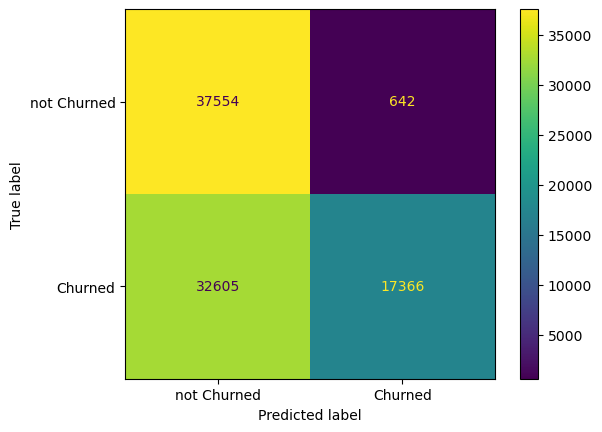

In [52]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_GB,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 7. Bagging meta-estimator
In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train,Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [55]:
pred_BE=bagging.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
BE_accuracy=accuracy_score(Y_test,pred_BE)
print("Accuracy:",BE_accuracy)

Accuracy: 0.5775857180124083


In [57]:
# Classification report
from sklearn.metrics import classification_report
BE_report=classification_report(Y_test,pred_BE)
print(BE_report)

              precision    recall  f1-score   support

           0       0.53      0.23      0.32     38196
           1       0.59      0.84      0.69     49971

    accuracy                           0.58     88167
   macro avg       0.56      0.54      0.51     88167
weighted avg       0.56      0.58      0.53     88167



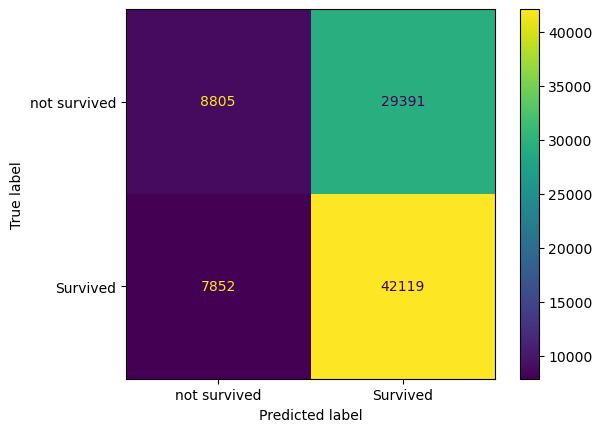

In [58]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_BE)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

### 8. MLP Classifier

In [59]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(64,32),max_iter=10,random_state=42)
mlp.fit(X_train,Y_train)

C:\Users\Nisha\Downloads\New folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=10, random_state=42)

In [60]:
pred_mlp=mlp.predict(X_test)
pred_mlp

array(['1', '1', '0', ..., '0', '1', '1'], dtype='<U1')

In [61]:
from sklearn.metrics import accuracy_score
mlp_accuracy=accuracy_score(Y_test,pred_mlp)
print("Accuracy:",mlp_accuracy)

Accuracy: 0.6182131636553359


In [62]:
# Classification report
from sklearn.metrics import classification_report
mlp_report=classification_report(Y_test,pred_mlp)
print(mlp_report)

              precision    recall  f1-score   support

           0       0.54      0.89      0.67     38196
           1       0.83      0.41      0.55     49971

    accuracy                           0.62     88167
   macro avg       0.68      0.65      0.61     88167
weighted avg       0.70      0.62      0.60     88167



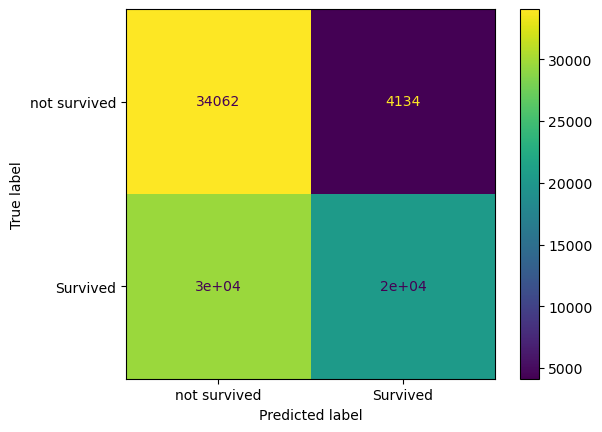

In [63]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_mlp,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

## 9.XGBooster

In [95]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(X_train,Y_train)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
pred_xgb=xgb.predict(X_test)
pred_xgb

array([1, 0, 1, ..., 0, 1, 0])

In [84]:
from sklearn.metrics import accuracy_score
xgb_accuracy=accuracy_score(Y_test,pred_xgb)
print("Accuracy:",xgb_accuracy)

Accuracy: 0.9998412104302064


In [85]:
# Classification report
from sklearn.metrics import classification_report
xgb_report=classification_report(Y_test,pred_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



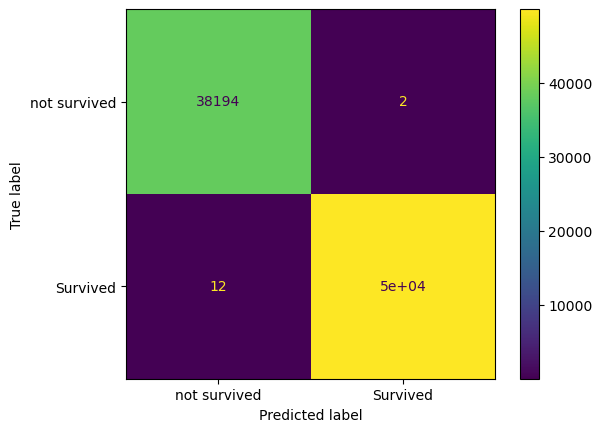

In [86]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_xgb)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

### 10. Stacking Classifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [66]:
# define base classsifier
base_classifiers=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier()),
    ('rf',RandomForestClassifier()),
]

# define meta classifier
meta_classifier=LogisticRegression()

In [67]:
# Create Stacking classifier
stack=StackingClassifier(estimators=base_classifiers,final_estimator=meta_classifier,cv=5)

# Train the stacking classifier
stack=stack.fit(X_train,Y_train)

In [68]:
pred_stack=stack.predict(X_test)
pred_stack

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [69]:
# Accuracy
from sklearn.metrics import accuracy_score
stack_accur_score=accuracy_score(Y_test,pred_stack)
print("Accuracy:",stack_accur_score)

Accuracy: 0.5948257284471514


In [70]:
# Classification report
from sklearn.metrics import classification_report
stack_report=classification_report(Y_test,pred_stack)
print(stack_report)

              precision    recall  f1-score   support

           0       0.54      0.46      0.50     38196
           1       0.63      0.70      0.66     49971

    accuracy                           0.59     88167
   macro avg       0.58      0.58      0.58     88167
weighted avg       0.59      0.59      0.59     88167



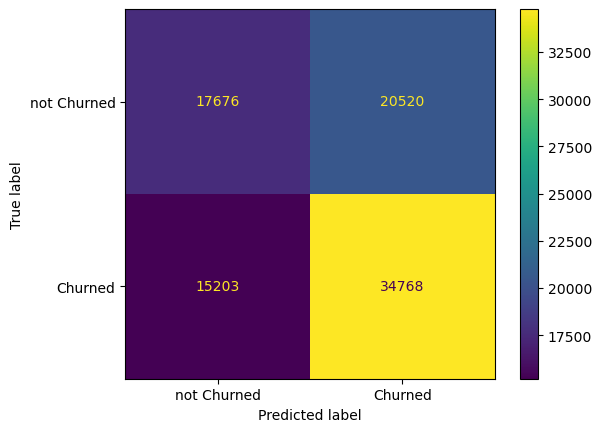

In [71]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_stack,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

# Accuracy graph

In [106]:
# Model Accuracy Comparison
Algorithem_model=pd.DataFrame({'Models':['LR','nb','knn','dtree','RF','gbc','bagging','mlp','stack'],
                        'Accuracy':[accuracy_score(Y_test,pred_LR),
                                    accuracy_score(Y_test,pred_NB),
                                    accuracy_score(Y_test,ky_pred),
                                    accuracy_score(Y_test,dt_pred),
                                    accuracy_score(Y_test,pred_RF),
                                    accuracy_score(Y_test,pred_GB),
                                    accuracy_score(Y_test,pred_BE),
                                    accuracy_score(Y_test,pred_mlp),
                                    accuracy_score(Y_test,pred_stack)],
                         'Precision':[precision_score(Y_test,pred_LR, pos_label='1'),
                                    precision_score(Y_test,pred_NB, pos_label='1'),
                                    precision_score(Y_test,ky_pred, pos_label='1'),
                                    precision_score(Y_test,dt_pred, pos_label='1'),
                                    precision_score(Y_test,pred_RF, pos_label='1'),
                                    precision_score(Y_test,pred_GB, pos_label='1'),
                                    precision_score(Y_test,pred_BE, pos_label='1'),
                                    precision_score(Y_test,pred_mlp, pos_label='1'),
                                    precision_score(Y_test,pred_stack, pos_label='1')],
                         'Recall':[recall_score(Y_test,pred_LR, pos_label='1'),
                                    recall_score(Y_test,pred_NB, pos_label='1'),
                                    recall_score(Y_test,ky_pred, pos_label='1'),
                                    recall_score(Y_test,dt_pred, pos_label='1'),
                                    recall_score(Y_test,pred_RF, pos_label='1'),
                                    recall_score(Y_test,pred_GB, pos_label='1'),
                                    recall_score(Y_test,pred_BE, pos_label='1'),
                                    recall_score(Y_test,pred_mlp, pos_label='1'),
                                    recall_score(Y_test,pred_stack, pos_label='1')]
                                })
Algorithem_model

,Models,Accuracy,Precision,Recall
0,LR,0.576021,0.602418,0.740970
1,nb,0.576077,0.602677,0.739709
2,knn,0.595778,0.644540,0.639471
3,dtree,0.602312,0.669463,0.589282
4,RF,0.598886,0.650088,0.633007
5,gbc,0.622909,0.964349,0.347522
6,bagging,0.577586,0.588995,0.842869
7,mlp,0.618213,0.831801,0.409117
8,stack,0.594826,0.628853,0.695764


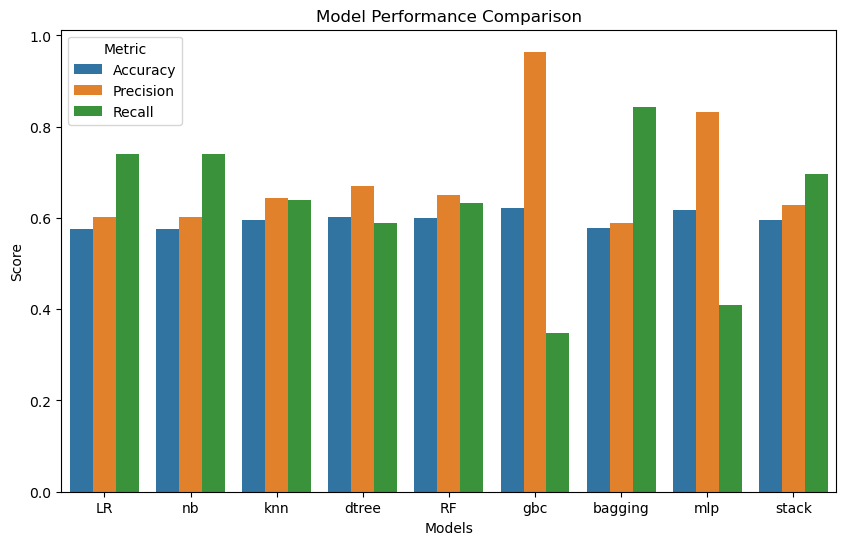

In [107]:
# Melt the DataFrame to long format for bar plot
Algorithem_model_melted = Algorithem_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Algorithem_model_melted, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :  
          KNN, Random Forest,decision tree, and stack show balanced performance across all three metrics.

## gridsearchcv comparision graph

In [104]:
# Create the DataFrame for model comparison
Grid_model = pd.DataFrame({
    'Models': ['LR', 'NB', 'KNN', 'DTree'],
    'Accuracy': [accuracy_score(Y_test, g_pred_LR),
                 accuracy_score(Y_test, g_pred_NB),
                 accuracy_score(Y_test, g_pred_knn),
                 accuracy_score(Y_test, g_pred_dtree)],
    'Precision': [precision_score(Y_test, g_pred_LR, pos_label='1'),
                  precision_score(Y_test, g_pred_NB, pos_label='1'),
                  precision_score(Y_test, g_pred_knn, pos_label='1'),
                  precision_score(Y_test, g_pred_dtree, pos_label='1')],
    'Recall': [recall_score(Y_test, g_pred_LR, pos_label='1'),
               recall_score(Y_test, g_pred_NB, pos_label='1'),
               recall_score(Y_test, g_pred_knn, pos_label='1'),
               recall_score(Y_test, g_pred_dtree, pos_label='1')]
})
Grid_model

,Models,Accuracy,Precision,Recall
0,LR,0.576021,0.602404,0.741050
1,NB,0.576111,0.602680,0.739869
2,KNN,0.601688,0.665611,0.597306
3,DTree,0.617215,0.841142,0.400212


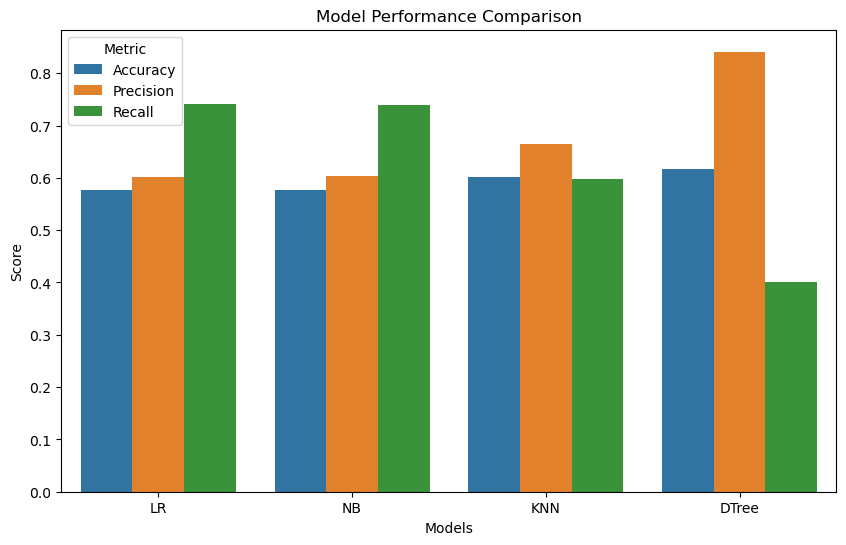

In [105]:
# Melt the DataFrame to long format for bar plot
Grid_model_melted = Grid_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Grid_model_melted, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :  
          KNN show balanced performance across all three metrics.Therefore KNN is more prefereble model.

## comparision of accuracy of Algorithem and Gridsearchcv

In [109]:
Comparision_model=pd.DataFrame({'Models':['LR','nb','knn','dtree'],
                        'Accuracy_O':[accuracy_score(Y_test,pred_LR),
                                    accuracy_score(Y_test,pred_NB),
                                    accuracy_score(Y_test,ky_pred),
                                    accuracy_score(Y_test,dt_pred),],
                        'Accuracy_G':[accuracy_score(Y_test, g_pred_LR),
                                    accuracy_score(Y_test,g_pred_NB),
                                    accuracy_score(Y_test,g_pred_knn),
                                    accuracy_score(Y_test,g_pred_dtree)]
                               })
Comparision_model

,Models,Accuracy_O,Accuracy_G
0,LR,0.576021,0.576021
1,nb,0.576077,0.576111
2,knn,0.595778,0.601688
3,dtree,0.602312,0.617215


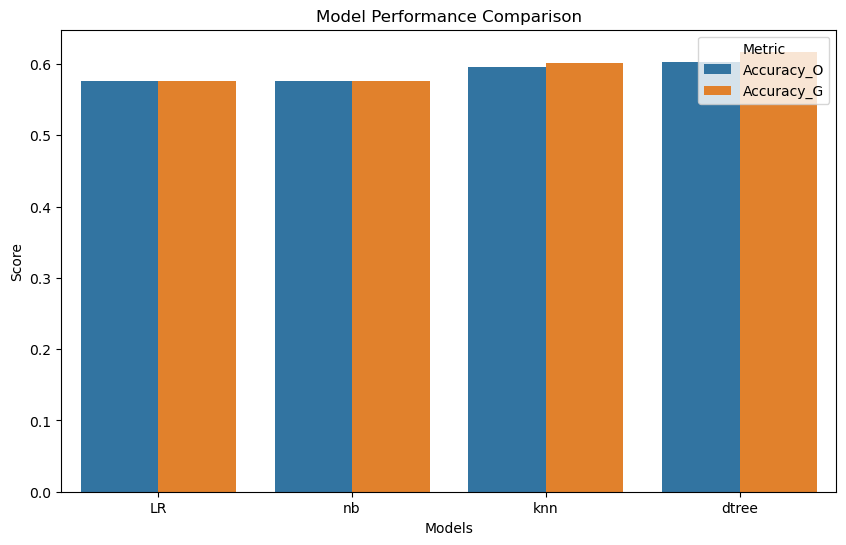

In [110]:
# Melt the DataFrame to long format for bar plot
Comparision = Comparision_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Comparision, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :
              From the above graph we can say that the accuracy achieved after applying GridSearchCv is superiour to that of the previous model.

## comparision of Precision of Algorithem and Gridsearchcv

In [111]:
Comparision_model1=pd.DataFrame({'Models':['LR','nb','knn','dtree'],
                        'Precision_O':[precision_score(Y_test,pred_LR, pos_label='1'),
                                    precision_score(Y_test,pred_NB, pos_label='1'),
                                    precision_score(Y_test,ky_pred, pos_label='1'),
                                    precision_score(Y_test,dt_pred, pos_label='1'),],
                        'precision_G':[precision_score(Y_test, g_pred_LR, pos_label='1'),
                                    precision_score(Y_test,g_pred_NB, pos_label='1'),
                                    precision_score(Y_test,g_pred_knn, pos_label='1'),
                                    precision_score(Y_test,g_pred_dtree, pos_label='1')]
                               })
Comparision_model

,Models,Accuracy_O,Accuracy_G
0,LR,0.576021,0.576021
1,nb,0.576077,0.576111
2,knn,0.595778,0.601688
3,dtree,0.602312,0.617215


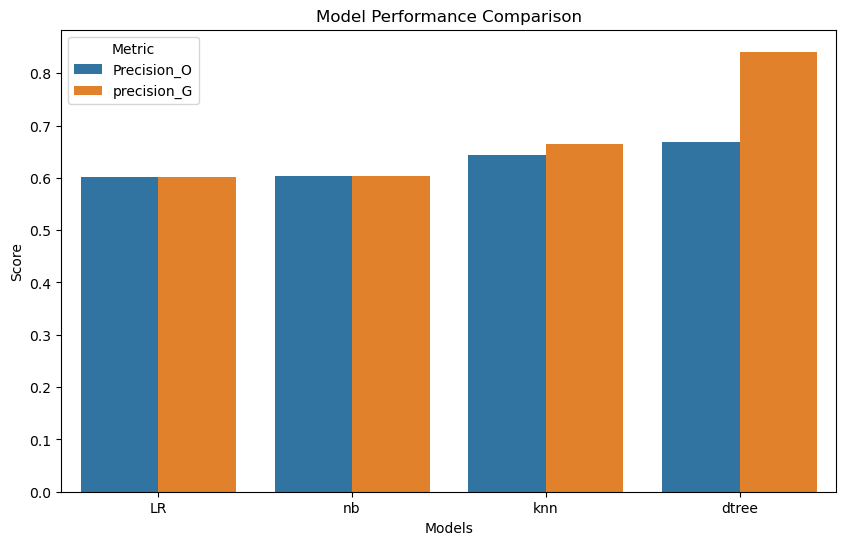

In [112]:
# Melt the DataFrame to long format for bar plot
Comparision = Comparision_model1.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Comparision, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :
              From the above graph we can say that the precision achieved after applying GridSearchCv is superiour to that of the previous model.